# Constructing a Dataset to Help Plan a Clinical Trial

# About Me

Hi, I’m Marin Schiffman, and I am a Biomedical Engineering student at Vanderbilt University. As I dive deeper into my academic career, it has become increasingly apparent that data analysis and the organization of information will be crucial in understanding the biomedical research that I hope to take part in. Through this notebook, I hope to demonstrate the new skills I have learned in data engineering.

# Project Summary

Clinical trials require lots of planning and are often quite particular in participants and requirements. Creating and organizing a dataset to help minimize the difficulty in identifying the right candidates to participate and/or run the trials would be valuable from both a physician and patient standpoint. Thus, the goal of this project was to construct a dataset that could be used to identify which physicians and hospitals should participate in various clinical trials. Moreover, constructing such a dataset would provide a wealth of information to the dataset viewer all in one place, providing multiple options, and therefore increasing the likelihood of a successful clinical trial. In this project, I completed an exploratory data analysis, cleaned and formatted data, merged datasets from multiple sources, and found multiple ways to highlight and visualize key insights that the dataset provides. The final result of this project is a comprehensive overview of vast datasets containing useful information for various clinical trials, with graphics that detail key characteristics to improve understanding, impact, and ease of use from those looking to design clinical trials.

In [ ]:
!ls /datasets/sources

DAC_NationalDownloadableFile.csv  facilities.txt  facility_investigators.txt


In [ ]:
import pandas as pd

In [ ]:
#importing all 3 datasets
df = pd.read_csv('/datasets/sources/DAC_NationalDownloadableFile.csv',nrows=10000) #medicare
df_fac = pd.read_csv('/datasets/sources/facilities.txt',error_bad_lines=False,sep="|") #facility
df_fi = pd.read_csv('/datasets/sources/facility_investigators.txt',error_bad_lines=False,sep="|") #facility investigators

In [ ]:
df_fac.shape

(2619514, 8)

In [ ]:
df_fi.shape

(221916, 5)

In [ ]:
#starting off by dropping columns and rows without sufficient information
df.dropna(thresh=3)
df_fac.dropna(thresh=3) #only keep rows with at least 3 non-NA values
df_fi.dropna(thresh=3);

# Cleaning Medicare Data

In [ ]:
#previewing data
df.head()

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,...,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215321872,3870667793,I20150803001151,MASIELLO,EVE,NaN,NaN,F,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,MA023603826PL120XXSTXX300
1,1215195664,6204988652,I20090715000375,DURU,CELESTINA,N,NaN,F,NaN,NEW YORK COLLEGE OF PODIATRIC MEDICINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX750619580IR2000XRDXX303
2,1215188925,5193982478,I20120130000697,KESHAVARZI,REZA,NaN,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,FL331434825SO7330XPLXX403
3,1215138714,8022188820,I20080605000567,PHAM,ANTHONY,NaN,NaN,M,NaN,"UNIVERSITY OF NORTH TEXAS HSC, COLLEGE OF OSTE...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX770724116HO11799STXX301
4,1215127840,8527950369,I20040326000913,NELSON VANCINI,MARCIA,E,NaN,F,CNS,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MA018105129AN2XXXXCIRX300


In [ ]:
df.shape 

(10000, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NPI              10000 non-null  int64  
 1    Ind_PAC_ID      10000 non-null  int64  
 2    Ind_enrl_ID     10000 non-null  object 
 3    lst_nm          10000 non-null  object 
 4    frst_nm         10000 non-null  object 
 5    mid_nm          7559 non-null   object 
 6    suff            206 non-null    object 
 7    gndr            10000 non-null  object 
 8    Cred            3620 non-null   object 
 9    Med_sch         10000 non-null  object 
 10   Grd_yr          9995 non-null   float64
 11   pri_spec        10000 non-null  object 
 12   sec_spec_1      1209 non-null   object 
 13   sec_spec_2      171 non-null    object 
 14   sec_spec_3      27 non-null     object 
 15   sec_spec_4      8 non-null      object 
 16   sec_spec_all    1209 non-null   object 
 17   org_nm      

In [ ]:
df.describe(include='all')

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,...,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
count,1.000000e+04,1.000000e+04,10000,10000,10000,7559,206,10000,3620,10000,...,1573,738.000000,732,345.000000,341,153.000000,152,10000,10000,10000
unique,NaN,NaN,9087,6568,2854,741,6,2,19,252,...,895,NaN,472,NaN,236,NaN,109,2,1,9907
top,NaN,NaN,I20060816000114,SMITH,MICHAEL,A,JR.,M,MD,OTHER,...,LONG ISLAND JEWISH MEDICAL CENTER,NaN,MEMORIAL HOSPITAL WEST,NaN,CROSSING RIVERS HEALTH MEDICAL CENTER,NaN,RIVER'S EDGE HOSPITAL & CLINIC,Y,M,MN559021906RO1216XSWXX400
freq,NaN,NaN,31,53,184,709,120,6300,1786,5246,...,13,NaN,11,NaN,7,NaN,7,8854,10000,13
mean,1.185268e+09,4.990590e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,240744.772358,NaN,239704.228986,NaN,236887.464052,NaN,NaN,NaN,NaN
std,1.778030e+07,2.851665e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,164234.327788,NaN,157588.495551,NaN,156863.792011,NaN,NaN,NaN,NaN
min,1.154356e+09,4.210315e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10021.000000,NaN,10001.000000,NaN,10061.000000,NaN,NaN,NaN,NaN
25%,1.174505e+09,2.567405e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100127.250000,NaN,100206.000000,NaN,100236.000000,NaN,NaN,NaN,NaN
50%,1.184703e+09,5.092606e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,230029.500000,NaN,220163.000000,NaN,230053.000000,NaN,NaN,NaN,NaN
75%,1.205008e+09,7.416282e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,370028.000000,NaN,360055.000000,NaN,360133.000000,NaN,NaN,NaN,NaN


In [ ]:
#which columns have the most empty space?
df.isnull().sum()

NPI                    0
 Ind_PAC_ID            0
 Ind_enrl_ID           0
 lst_nm                0
 frst_nm               0
 mid_nm             2441
 suff               9794
 gndr                  0
 Cred               6380
 Med_sch               0
 Grd_yr                5
 pri_spec              0
 sec_spec_1         8791
 sec_spec_2         9829
 sec_spec_3         9973
 sec_spec_4         9992
 sec_spec_all       8791
 org_nm            10000
 org_pac_id        10000
 num_org_mem       10000
 adr_ln_1              0
 adr_ln_2           4870
 ln_2_sprs          9936
 cty                   0
 st                    0
 zip                   0
 phn_numbr          6682
 hosp_afl_1         6873
 hosp_afl_lbn_1     6888
 hosp_afl_2         8411
 hosp_afl_lbn_2     8427
 hosp_afl_3         9262
 hosp_afl_lbn_3     9268
 hosp_afl_4         9655
 hosp_afl_lbn_4     9659
 hosp_afl_5         9847
 hosp_afl_lbn_5     9848
 ind_assgn             0
 grp_assgn             0
 adrs_id               0


In [ ]:
df.NPI.nunique()

8983

In [ ]:
df.duplicated(subset=['NPI'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
df.NPI.duplicated().sum()

1017

In [ ]:
df.loc[df.NPI.duplicated(),:]

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,...,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
34,1215138391,5991895575,I20071219000653,ONEAL,DALE,W,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,CA926511519LA266XXSTXX300
52,1215168943,4688916042,I20190505000000,DAUSEND,BARBARAANN,F,NaN,F,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,AZ853814873PE13373BLVD600
83,1215161161,6608197421,I20150605000414,AGUILAR,MARGARET,L,NaN,F,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NM879042836TR400XXBROA301
86,1215236187,4688823321,I20121023000000,DENNIS-NFOR,BIJOU,M,NaN,F,NaN,NEW YORK COLLEGE OF PODIATRIC MEDICINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY105983723YO681XXDRXX300
88,1215188925,5193982478,I20120130000697,KESHAVARZI,REZA,NaN,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,FL331463048CO1550XAVEX303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,1154690972,345504312,I20180430001049,PERALTA HERNANDEZ,RICHARD,NaN,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY109271145HA65XXXBROA201
9850,1154388064,7618966243,I20050718000788,LEMBO,NANCY,R,NaN,F,DO,NEW YORK COLLEGE OF OSTEO MEDICINE OF NEW YORK...,...,COLLETON MEDICAL CENTER,420079.0,TRIDENT MEDICAL CENTER,NaN,NaN,NaN,NaN,Y,M,SC294858796SU763XXDXXX400
9876,1154361434,1355345539,I20131113001374,KIM,CHARLES,S,NaN,M,MD,UNIVERSITY OF ARKANSAS COLLEGE OF MEDICINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MN554231033ED6200XSXXX400
9914,1154471662,3072795756,I20110317000172,WANG,KUAN-I,NaN,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,CA917541172MO600XXAVEX402


In [ ]:
df.drop(' sec_spec_1',inplace=True,axis=1)
df.drop(' sec_spec_2',inplace=True,axis=1)
df.drop(' sec_spec_3',inplace=True,axis=1)
df.drop(' sec_spec_4',inplace=True,axis=1)
df.drop(' ln_2_sprs',inplace=True,axis=1)
df.drop(' ind_assgn',inplace=True,axis=1)
df.drop(' grp_assgn',inplace=True,axis=1)
df.drop(' Ind_PAC_ID',inplace=True,axis=1)
df.drop(' org_pac_id',inplace=True,axis=1)
df.drop(' org_nm',inplace=True,axis=1)
df.drop(' num_org_mem',inplace=True,axis=1)
df.drop(' adrs_id',inplace=True,axis=1)
df.drop(' Ind_enrl_ID',inplace=True,axis=1)
df.drop(' hosp_afl_1',inplace=True,axis=1)
df.drop(' hosp_afl_2',inplace=True,axis=1)
df.drop(' hosp_afl_3',inplace=True,axis=1)
df.drop(' hosp_afl_4',inplace=True,axis=1)
df.drop(' hosp_afl_5',inplace=True,axis=1)

In [ ]:
df.rename(columns={' frst_nm':'frst_nm', ' mid_name':'mid_name',' lst_nm':'lst_nm',' mid_nm':'mid_nm',' suff':'suff','gndr':'gndr',' Cred':'Cred',' Med_sch':'Med_sch',' Grd_yr':'Grd_yr',' pri_spec':'pri_spec',' sec_spec_all':'sec_spec_all',' org_nm':'org_nm',' org_pac_id':'org_pac_id',' num_org_mem':'num_org_mem',' adr_ln_1':'adr_ln_1',' adr_ln_2':'adr_ln_2',' city':'city',' st':'st',' zip':'zip',' phn_numbr':'phn_numbr',' hosp_afl_1':'hosp_afl_1',' hosp_afl_lbn_1':'hosp_afl_lbn_1',' hosp_afl_2':'hosp_afl_2',' hosp_afl_lbn_2':'hosp_afl_lbn_2',' hosp_afl_3':'hosp_afl_3',' hosp_afl_lbn_3':'hosp_afl_lbn_3',' hosp_afl_4':'hosp_afl_4',' hosp_afl_lbn_4':'hosp_afl_lbn_4',' hosp_afl_5':'hosp_afl_5',' hosp_afl_lbn_5':'hosp_afl_lbn_5',' cty':'cty'},inplace=True)
df['mid_nm'] = df['mid_nm'].str[0]
df.suff = df.suff.fillna('')
df.mid_nm = df.mid_nm.fillna('')
df.adr_ln_2 = df.adr_ln_2.fillna('')

df['full_name'] = df[['frst_nm', 'mid_nm','lst_nm','suff']].agg(' '.join, axis=1)
df['adr'] = df[['adr_ln_1', 'adr_ln_2']].agg(' '.join,axis=1)

In [ ]:

df.drop('suff',inplace=True,axis=1)
df.drop('lst_nm',inplace=True,axis=1)
df.drop('mid_nm',inplace=True,axis=1)
df.drop('frst_nm',inplace=True,axis=1)
df.drop('adr_ln_1',inplace=True,axis=1)
df.drop('adr_ln_2',inplace=True,axis=1)

sec_column = df.pop('full_name')
df.insert(1, 'full_name', sec_column)
adr_column = df.pop('adr')
df.insert(8,'adr', adr_column)

df['full_name'] = df['full_name'].str.title()
df['Med_sch']= df['Med_sch'].str.title()
df['pri_spec']= df['pri_spec'].str.title()
df['sec_spec_all']= df['sec_spec_all'].str.title()
df['adr']= df['adr'].str.title()
df['cty']=df['cty'].str.title()
df['hosp_afl_lbn_1']=df['hosp_afl_lbn_1'].str.title()
df

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_all,adr,cty,st,zip,phn_numbr,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5
0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,NaN,120 Court St,Plymouth,MA,023603826,7.817107e+09,NaN,NaN,NaN,NaN,NaN
1,1215195664,Celestina N Duru,F,NaN,New York College Of Podiatric Medicine,2007.0,Podiatry,NaN,2000 Esters Rd Suite 104,Irving,TX,750619580,NaN,NaN,NaN,NaN,NaN,NaN
2,1215188925,Reza Keshavarzi,M,NaN,University Of Kentucky College Of Medicine,2005.0,General Surgery,NaN,7330 Sw 62Nd Pl Suite 210,South Miami,FL,331434825,NaN,NaN,NaN,NaN,NaN,NaN
3,1215138714,Anthony Pham,M,NaN,"University Of North Texas Hsc, College Of Oste...",2003.0,Physical Medicine And Rehabilitation,Interventional Pain Management,11799 Beechnut St Suite A,Houston,TX,770724116,NaN,NaN,NaN,NaN,NaN,NaN
4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),NaN,2 Brentwood Cir,Andover,MA,018105129,9.783359e+09,Lawrence General Hospital,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1154398477,Richard S Faulk,M,NaN,Medical University Of South Carolina College O...,1993.0,Psychiatry,NaN,2601 E Oakland Park Blvd Suite 207,Fort Lauderdale,FL,333061658,NaN,NaN,NaN,NaN,NaN,NaN
9996,1154405488,Maria E Chirino-Socias,F,NaN,University Central Del Caribe Escuela De Medicina,1992.0,Rheumatology,Internal Medicine,690 Calle Cesar Gonzalez Suite 500,San Juan,PR,009183917,7.877535e+09,Auxilio Mutuo Hospital,NaN,NaN,NaN,NaN
9997,1154377315,Alex A Lazar,M,MD,New York University School Of Medicine,1996.0,Psychiatry,NaN,16055 Ventura Blvd Suite 601,Encino,CA,914362618,NaN,NaN,NaN,NaN,NaN,NaN
9998,1154359230,Vasif A Humayun,M,MD,Other,1984.0,Internal Medicine,NaN,11410 E Fwy Suite 168,Houston,TX,770291986,NaN,NaN,NaN,NaN,NaN,NaN


I&nbsp;notice&nbsp;there&nbsp;are&nbsp;still&nbsp;a&nbsp;lot&nbsp;of&nbsp;empty&nbsp;boxes,&nbsp;so I will further reduce this using function that evaluates the percentage of nan in a column.

In [ ]:
perc = 75
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)
df

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip,phn_numbr,hosp_afl_lbn_1
0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,120 Court St,Plymouth,MA,023603826,7.817107e+09,NaN
1,1215195664,Celestina N Duru,F,NaN,New York College Of Podiatric Medicine,2007.0,Podiatry,2000 Esters Rd Suite 104,Irving,TX,750619580,NaN,NaN
2,1215188925,Reza Keshavarzi,M,NaN,University Of Kentucky College Of Medicine,2005.0,General Surgery,7330 Sw 62Nd Pl Suite 210,South Miami,FL,331434825,NaN,NaN
3,1215138714,Anthony Pham,M,NaN,"University Of North Texas Hsc, College Of Oste...",2003.0,Physical Medicine And Rehabilitation,11799 Beechnut St Suite A,Houston,TX,770724116,NaN,NaN
4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),2 Brentwood Cir,Andover,MA,018105129,9.783359e+09,Lawrence General Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1154398477,Richard S Faulk,M,NaN,Medical University Of South Carolina College O...,1993.0,Psychiatry,2601 E Oakland Park Blvd Suite 207,Fort Lauderdale,FL,333061658,NaN,NaN
9996,1154405488,Maria E Chirino-Socias,F,NaN,University Central Del Caribe Escuela De Medicina,1992.0,Rheumatology,690 Calle Cesar Gonzalez Suite 500,San Juan,PR,009183917,7.877535e+09,Auxilio Mutuo Hospital
9997,1154377315,Alex A Lazar,M,MD,New York University School Of Medicine,1996.0,Psychiatry,16055 Ventura Blvd Suite 601,Encino,CA,914362618,NaN,NaN
9998,1154359230,Vasif A Humayun,M,MD,Other,1984.0,Internal Medicine,11410 E Fwy Suite 168,Houston,TX,770291986,NaN,NaN


# Cleaning Facilities and Facility Investigators Before Merge

In [ ]:
#previewing dataset
df_fi.head(n=100)

,id,nct_id,facility_id,role,name
0,1653475,NCT04631068,8707217,Principal Investigator,"Cedric Schweitzer, MD"
1,1653476,NCT04631068,8707217,Sub-Investigator,"David Toubol, MD"
2,1653477,NCT04631068,8707218,Principal Investigator,"Tiago Monteiro, MD"
3,1653478,NCT04631068,8707219,Principal Investigator,"Paul Rosen, FRCOphth"
4,1653479,NCT04631146,8707230,Principal Investigator,"Yilong Wu, MD"
...,...,...,...,...,...
95,1518668,NCT02567422,8342869,Principal Investigator,Darrion L. Mitchell
96,1518669,NCT02567422,8342870,Principal Investigator,Dan P. Zandberg
97,1518670,NCT02567422,8342871,Principal Investigator,Varinder Kaur
98,1653537,NCT04629105,8707525,Principal Investigator,"John P Galliard, MD"


In [ ]:
df_fac.drop('status',inplace=True,axis=1)
df_fac.rename(columns = {'name':'hospital'},inplace=True)
#note: id = facility id

In [ ]:
df_fac.head()

,id,nct_id,hospital,city,state,zip,country
0,8790702,NCT03724162,Oslo University Hospital,Oslo,NaN,0424,Norway
1,8790703,NCT03724162,"Department of vascular surgery, Oslo Universit...",Oslo,NaN,NaN,Norway
2,8790704,NCT03723954,Golf National,Saint-Quentin-en-Yvelines,NaN,78280,France
3,8790705,NCT03723668,Kidney Transplantation Care at Veteran's Affai...,Philadelphia,Pennsylvania,19104,United States
4,8790706,NCT03723668,Paris Transplant Group,Paris,NaN,75015,France


In [ ]:
df_fac_extract = df_fac[["hospital"]]
df_fac_extract

,hospital
0,Oslo University Hospital
1,"Department of vascular surgery, Oslo Universit..."
2,Golf National
3,Kidney Transplantation Care at Veteran's Affai...
4,Paris Transplant Group
...,...
2619509,Akademicki Szpital Kliniczny im. Jana Mikulicz...
2619510,New York State Psychiatric Institute at Columb...
2619511,"Masonic Cancer Center, University of Minnesota"
2619512,UCLA


In [ ]:
#previewing facility investigator data
df_fi.head(n=100)

,id,nct_id,facility_id,role,name
0,1653475,NCT04631068,8707217,Principal Investigator,"Cedric Schweitzer, MD"
1,1653476,NCT04631068,8707217,Sub-Investigator,"David Toubol, MD"
2,1653477,NCT04631068,8707218,Principal Investigator,"Tiago Monteiro, MD"
3,1653478,NCT04631068,8707219,Principal Investigator,"Paul Rosen, FRCOphth"
4,1653479,NCT04631146,8707230,Principal Investigator,"Yilong Wu, MD"
...,...,...,...,...,...
95,1518668,NCT02567422,8342869,Principal Investigator,Darrion L. Mitchell
96,1518669,NCT02567422,8342870,Principal Investigator,Dan P. Zandberg
97,1518670,NCT02567422,8342871,Principal Investigator,Varinder Kaur
98,1653537,NCT04629105,8707525,Principal Investigator,"John P Galliard, MD"


In [ ]:
#decided to drop id bc there are so many different ids for each dataset. can add back in later if needed.
df_fi.drop('id',inplace=True,axis=1)
df_fi

,nct_id,facility_id,role,name
0,NCT04631068,8707217,Principal Investigator,"Cedric Schweitzer, MD"
1,NCT04631068,8707217,Sub-Investigator,"David Toubol, MD"
2,NCT04631068,8707218,Principal Investigator,"Tiago Monteiro, MD"
3,NCT04631068,8707219,Principal Investigator,"Paul Rosen, FRCOphth"
4,NCT04631146,8707230,Principal Investigator,"Yilong Wu, MD"
...,...,...,...,...
221911,NCT03726320,7718790,Principal Investigator,"Danil Makarov, MD"
221912,NCT03709134,7718908,Principal Investigator,"Kasia J Jerzak, MD, MSc"
221913,NCT03706482,7718909,Principal Investigator,"Eva Åström, MD PhD"
221914,NCT03706482,7718909,Sub-Investigator,"Mikael Sundin, MD PhD"


# Combining Facility and Facility Investigator Data

In [ ]:

df_joined = pd.merge(df_fi,df_fac,how="left", left_on='facility_id',right_on='id')

In [ ]:
df_joined.head(n=1000)

,nct_id_x,facility_id,role,name,id,nct_id_y,hospital,city,state,zip,country
0,NCT04631068,8707217,Principal Investigator,"Cedric Schweitzer, MD",8707217,NCT04631068,University Hospital Pellegrin,Bordeaux,Cedex,33076,France
1,NCT04631068,8707217,Sub-Investigator,"David Toubol, MD",8707217,NCT04631068,University Hospital Pellegrin,Bordeaux,Cedex,33076,France
2,NCT04631068,8707218,Principal Investigator,"Tiago Monteiro, MD",8707218,NCT04631068,Hospital de Braga,Braga,NaN,4710-243,Portugal
3,NCT04631068,8707219,Principal Investigator,"Paul Rosen, FRCOphth",8707219,NCT04631068,Oxford Eye Hospital,Oxford,NaN,OX3 9DU,United Kingdom
4,NCT04631146,8707230,Principal Investigator,"Yilong Wu, MD",8707230,NCT04631146,"Guangdong Lung Cancer Institute, Guangdong Gen...",Guangzhou,Guangdong,510080,China
...,...,...,...,...,...,...,...,...,...,...,...
995,NCT04015700,11121906,Sub-Investigator,"Jiayi Huang, M.D.",11121906,NCT04015700,Washington University School of Medicine,Saint Louis,Missouri,63110,United States
996,NCT04015726,11121911,Principal Investigator,"Ambady Ramachandran, MD, PhD, DSc",11121911,NCT04015726,India Diabetes Research Foundation,Chennai,Tamil Nadu,600008,India
997,NCT04015635,11121919,Principal Investigator,eleanor c murray,11121919,NCT04015635,Clinical Research Facility,Glasgow,City Of Glasgow,G51 4LB,United Kingdom
998,NCT04015778,11122009,Principal Investigator,"Yi-Long Wu, MD",11122009,NCT04015778,"Guangdong Lung Cancer Institute, Guangdong Gen...",Guangzhou,Guangdong,510080,China


# Adding Facility Datasets to Medicare Dataset

In [ ]:
df_all = pd.merge(df,df_joined,how="left", left_on=['full_name','hosp_afl_lbn_1'],right_on=['name','hospital'])
df_all

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,...,facility_id,role,name,id,nct_id_y,hospital,city,state,zip_y,country
0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,120 Court St,Plymouth,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215195664,Celestina N Duru,F,NaN,New York College Of Podiatric Medicine,2007.0,Podiatry,2000 Esters Rd Suite 104,Irving,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215188925,Reza Keshavarzi,M,NaN,University Of Kentucky College Of Medicine,2005.0,General Surgery,7330 Sw 62Nd Pl Suite 210,South Miami,FL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215138714,Anthony Pham,M,NaN,"University Of North Texas Hsc, College Of Oste...",2003.0,Physical Medicine And Rehabilitation,11799 Beechnut St Suite A,Houston,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),2 Brentwood Cir,Andover,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1154398477,Richard S Faulk,M,NaN,Medical University Of South Carolina College O...,1993.0,Psychiatry,2601 E Oakland Park Blvd Suite 207,Fort Lauderdale,FL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,1154405488,Maria E Chirino-Socias,F,NaN,University Central Del Caribe Escuela De Medicina,1992.0,Rheumatology,690 Calle Cesar Gonzalez Suite 500,San Juan,PR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,1154377315,Alex A Lazar,M,MD,New York University School Of Medicine,1996.0,Psychiatry,16055 Ventura Blvd Suite 601,Encino,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,1154359230,Vasif A Humayun,M,MD,Other,1984.0,Internal Medicine,11410 E Fwy Suite 168,Houston,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The Merged Dataset Consisting of Medicare, Facility, and Facility Investigator Data

In [ ]:
#eliminating null columns

df_nodupes = df_all.drop_duplicates(
  subset = ['full_name', 'hosp_afl_lbn_1'],
  keep = 'first').reset_index(drop = True)

perc = 75
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df_nodupes = df_nodupes.dropna( axis=1, 
                thresh=min_count)
df_nodupes.head(n=50)

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,120 Court St,Plymouth,MA,023603826,7.817107e+09,NaN
1,1215195664,Celestina N Duru,F,NaN,New York College Of Podiatric Medicine,2007.0,Podiatry,2000 Esters Rd Suite 104,Irving,TX,750619580,NaN,NaN
2,1215188925,Reza Keshavarzi,M,NaN,University Of Kentucky College Of Medicine,2005.0,General Surgery,7330 Sw 62Nd Pl Suite 210,South Miami,FL,331434825,NaN,NaN
3,1215138714,Anthony Pham,M,NaN,"University Of North Texas Hsc, College Of Oste...",2003.0,Physical Medicine And Rehabilitation,11799 Beechnut St Suite A,Houston,TX,770724116,NaN,NaN
4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),2 Brentwood Cir,Andover,MA,018105129,9.783359e+09,Lawrence General Hospital
5,1215349154,Nana F Arkhurst-Arthur,F,NaN,Other,2013.0,Nurse Practitioner,1006 N Arendell Ave,Zebulon,NC,275972352,NaN,Nash General Hospital
6,1215186309,Tania L Ramirez Perez,F,NaN,University Of Puerto Rico School Of Medicine,2008.0,Nephrology,313 Calle Manuel Domenech Suite 101,San Juan,PR,009183532,7.877637e+09,Auxilio Mutuo Hospital
7,1215254925,Laurene L Clossey,F,NaN,Other,2004.0,Clinical Social Worker,101 Mountain Ct Suite 101B,Hackettstown,NJ,078402300,NaN,NaN
8,1215284070,Megan Franklin,F,NaN,Other,2012.0,Chiropractic,900 N Swallowtail Dr 104 D,Port Orange,FL,321296103,NaN,NaN
9,1215161161,Margaret L Aguilar,F,NaN,Other,1999.0,Clinical Social Worker,1232 Barker Rd,Las Cruces,NM,880053182,5.756525e+09,NaN


In [ ]:
df_nodupes.to_csv('merged.csv')

In [ ]:
df_nodupes.full_name.duplicated().sum()

2

In [ ]:
df_nodupes.loc[df_nodupes.full_name.duplicated(),:]

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
4181,1184725897,Jeffrey A Miller,M,MD,New York College Of Osteo Medicine Of New York...,1987.0,Pulmonary Disease,6 Brighton Rd Suite 106,Clifton,NJ,070121647,NaN,Saint Barnabas Medical Center
7358,1164652418,Sandeep Gupta,M,NaN,Ohio State University College Of Medicine,2009.0,Psychiatry,4447 Talmadge Rd,Toledo,OH,436233500,NaN,NaN


# How Many Matches Were There?

In [ ]:
import numpy as np
before = df_all.shape[0]
after = df_nodupes.shape[0]
  
print ("Before Eliminating Duplicates : ", before)
print ("After Eliminating Duplicates : ", after)
    
matched = np.subtract(before, after) 
print ("Total Matched : ", matched) 

m = np.divide(matched,before)
percentage = "{:.0%}". format(m)
print ("Percent Matched: ",percentage)

Before Eliminating Duplicates :  10000
After Eliminating Duplicates :  8979
Total Matched :  1021
Percent Matched:  10%


# Visualization of Data

In [ ]:
#looking at all of the categories
df_nodupes.head(n=10000)

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,120 Court St,Plymouth,MA,023603826,7.817107e+09,NaN
1,1215195664,Celestina N Duru,F,NaN,New York College Of Podiatric Medicine,2007.0,Podiatry,2000 Esters Rd Suite 104,Irving,TX,750619580,NaN,NaN
2,1215188925,Reza Keshavarzi,M,NaN,University Of Kentucky College Of Medicine,2005.0,General Surgery,7330 Sw 62Nd Pl Suite 210,South Miami,FL,331434825,NaN,NaN
3,1215138714,Anthony Pham,M,NaN,"University Of North Texas Hsc, College Of Oste...",2003.0,Physical Medicine And Rehabilitation,11799 Beechnut St Suite A,Houston,TX,770724116,NaN,NaN
4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),2 Brentwood Cir,Andover,MA,018105129,9.783359e+09,Lawrence General Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,1154398477,Richard S Faulk,M,NaN,Medical University Of South Carolina College O...,1993.0,Psychiatry,2601 E Oakland Park Blvd Suite 207,Fort Lauderdale,FL,333061658,NaN,NaN
8975,1154405488,Maria E Chirino-Socias,F,NaN,University Central Del Caribe Escuela De Medicina,1992.0,Rheumatology,690 Calle Cesar Gonzalez Suite 500,San Juan,PR,009183917,7.877535e+09,Auxilio Mutuo Hospital
8976,1154377315,Alex A Lazar,M,MD,New York University School Of Medicine,1996.0,Psychiatry,16055 Ventura Blvd Suite 601,Encino,CA,914362618,NaN,NaN
8977,1154359230,Vasif A Humayun,M,MD,Other,1984.0,Internal Medicine,11410 E Fwy Suite 168,Houston,TX,770291986,NaN,NaN


In [ ]:
# get top 10 most frequent states
n = 10
pop_states = df_nodupes['st'].value_counts()[:n].index.tolist()
pop_states

['CA', 'NY', 'TX', 'FL', 'NJ', 'IL', 'MI', 'PA', 'MA', 'PR']

Top States in the Dataset

Text(0.5, 1.0, 'Top States in the Dataset')

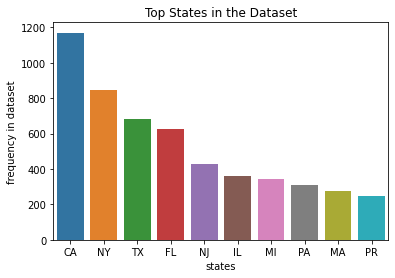

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
states = sns.countplot(x='st', data=df_nodupes,order=df_nodupes.st.value_counts()[:10].index)
states.set_xlabel('states')
states.set_ylabel('frequency in dataset')
states.set_title('Top States in the Dataset')

In [ ]:
import matplotlib.pyplot as plt

Male to Female Ratio of Dataset

Text(0.5, 1.0, 'Male to Female Ratio')

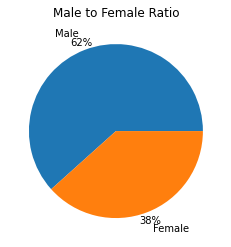

In [ ]:
gender_diff = df_nodupes[' gndr']. value_counts() 
plt.pie(gender_diff,labels=['Male','Female'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Male to Female Ratio')

In [ ]:
# get top 10 most frequent specialties
n = 10
df_nodupes['pri_spec'].value_counts()[:n].index.tolist()

['Chiropractic',
 'Clinical Social Worker',
 'Psychologist, Clinical',
 'Internal Medicine',
 'Optometry',
 'Family Medicine',
 'Physical Therapy',
 'Nurse Practitioner',
 'Podiatry',
 'Psychiatry']

Which primary specialties are most abundant in this dataset?

In [ ]:
top_specs = df_nodupes.pivot_table(columns=['pri_spec'], aggfunc='size').nlargest(10)
top_specs

pri_spec
Chiropractic              1586
Clinical Social Worker    1020
Psychologist, Clinical     807
Internal Medicine          780
Optometry                  553
Family Medicine            537
Physical Therapy           361
Nurse Practitioner         349
Podiatry                   314
Psychiatry                 248
dtype: int64

In [ ]:
df_top_specs = pd.DataFrame(top_specs)
df_top_specs

,0
pri_spec,
Chiropractic,1586
Clinical Social Worker,1020
"Psychologist, Clinical",807
Internal Medicine,780
Optometry,553
Family Medicine,537
Physical Therapy,361
Nurse Practitioner,349
Podiatry,314


Top Specialties

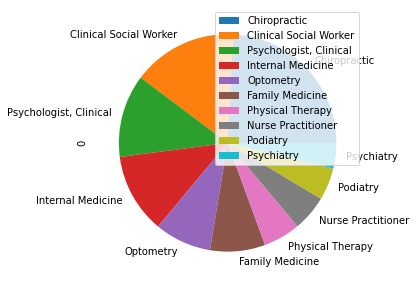

In [ ]:
plot = df_top_specs.plot.pie(subplots=True, figsize=(5, 5))

In [ ]:
# get top 10 most frequent med schools
n = 10
df_nodupes['Med_sch'].value_counts()[:n].index.tolist()

['Other',
 'Palmer College Chiropractic - Davenport',
 'Life Chiropractic College',
 'Logan College Of Chiropractic',
 'New York Chiropractic College',
 'Northwestern College Of Chiropractic',
 'Palmer College Chiropractic -  West Sunnyvale',
 'National College Of Chiropractic',
 'Life Chiropractic College - West',
 'Cleveland Chiropractic College - Kansas City']

In [ ]:
top_sch = df_nodupes.pivot_table(columns=['Med_sch'], aggfunc='size').nlargest(11)
df_top_sch = pd.DataFrame(top_sch)
df_top_sch = df_top_sch.drop(index=('Other'))

In [ ]:
df_top_sch.head

<bound method NDFrame.head of                                                  0
Med_sch                                           
Palmer College Chiropractic - Davenport        246
Life Chiropractic College                      148
Logan College Of Chiropractic                  144
New York Chiropractic College                   96
Northwestern College Of Chiropractic            92
Palmer College Chiropractic -  West Sunnyvale   91
National College Of Chiropractic                89
Life Chiropractic College - West                84
Cleveland Chiropractic College - Kansas City    69
University Of Puerto Rico School Of Medicine    69>

Which medical schools did these healthcare providers attend?

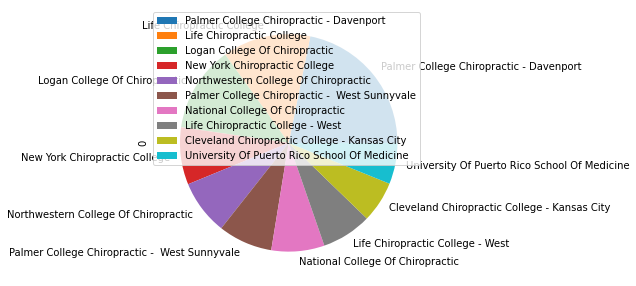

In [ ]:
plot = df_top_sch.plot.pie(subplots=True, figsize=(5, 5))

# Interactive Query

In [ ]:
df_specialties = df_nodupes[["pri_spec"]]
df_specialties.drop_duplicates('pri_spec')
df_state = df_nodupes[["st"]]
df_state.loc[df_state.st.duplicated(),:]


,st
3,TX
4,MA
8,FL
14,MA
15,CA
...,...
8974,FL
8975,PR
8976,CA
8977,TX


In [ ]:
df_state = df_state.drop_duplicates(subset=None, keep='first', inplace=False)
df_state

,st
0,MA
1,TX
2,FL
5,NC
6,PR
7,NJ
9,NM
10,AL
11,AZ
12,CA


# Begin By Searching for Information by State

Please enter the state you would like to search for below.

In [ ]:
state = 'MA'

In [ ]:
contains_state = df_nodupes[df_nodupes['st'].str.contains(state)]

In [ ]:
pop_specs = contains_state.pivot_table(columns=['pri_spec'], aggfunc='size').nlargest(10)
print('These are the specialties that are most abundant in your selected state:')
print(pop_specs)

These are the specialties that are most abundant in your selected state:
pri_spec
Clinical Social Worker                       98
Chiropractic                                 37
Psychologist, Clinical                       34
Optometry                                    17
Internal Medicine                            15
Physical Therapy                             13
Psychiatry                                   12
Certified Clinical Nurse Specialist (Cns)     7
Podiatry                                      5
Nurse Practitioner                            4
dtype: int64


These are the cities within your selected state with the most professionals in the dataset.

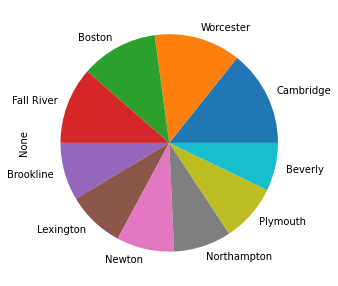

In [ ]:
cities = contains_state.pivot_table(columns=['cty'], aggfunc='size').nlargest(10)
plot_cities = cities.plot.pie(subplots=True, figsize=(5, 5))

In [ ]:
list_cty = pd.DataFrame(contains_state.cty)
n = 10
list_cty = list_cty['cty'].value_counts()[:n].index.tolist()
list_cty


['Cambridge',
 'Worcester',
 'Fall River',
 'Boston',
 'Lexington',
 'Northampton',
 'Newton',
 'Brookline',
 'Plymouth',
 'Beverly']

In [ ]:
contains_state

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,120 Court St,Plymouth,MA,023603826,7.817107e+09,NaN
4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),2 Brentwood Cir,Andover,MA,018105129,9.783359e+09,Lawrence General Hospital
14,1215237664,Sonja Vincola,F,NaN,Other,2004.0,Clinical Social Worker,61 Boxford Rd,Rowley,MA,019692419,9.788539e+09,NaN
164,1215158522,Laura Debruin,F,NaN,Other,2004.0,Physical Therapy,18 Brimfield Way,Westfield,MA,010854383,NaN,NaN
166,1215256201,Joel A Krieg,M,NaN,Other,2007.0,Clinical Social Worker,10 Concord Ave,Cambridge,MA,021382322,6.176820e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,1154385078,Matthew P Butler,M,DPM,Temple University School Of Medicine,1993.0,Podiatry,1153 Centre St Suite 5980,Boston,MA,021303446,6.179832e+09,Northeast Hospital Corporation
8922,1154478170,Thomas W Wright,M,CSW,Other,1990.0,Clinical Social Worker,297 Russell Rd,Westfield,MA,010852101,4.138756e+09,NaN
8926,1154477644,Susan Gottlieb,F,NaN,Other,1977.0,"Psychologist, Clinical",259 Massachusetts Ave,Arlington,MA,024748406,7.816410e+09,NaN
8967,1154461077,Gail Karanikolas Perry,F,CNS,Other,1987.0,Certified Clinical Nurse Specialist (Cns),50 N 2Nd St,New Bedford,MA,027406272,5.089976e+09,Southcoast Hospitals Group


Choose a City to Find a Hospital

In [ ]:
city = 'Cambridge'

In [ ]:
contains_cty = pd.DataFrame(df_nodupes[df_nodupes['cty'].str.contains(city)])
contains_cty

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
166,1215256201,Joel A Krieg,M,NaN,Other,2007.0,Clinical Social Worker,10 Concord Ave,Cambridge,MA,021382322,6.176820e+09,NaN
639,1215039888,Lynn R Bratman,F,NaN,Other,1978.0,Clinical Social Worker,339 Broadway,Cambridge,MA,021391839,6.174910e+09,NaN
909,1215008321,Seward T Hunter,M,CSW,Other,1989.0,Clinical Social Worker,49 Hancock St Suite 101,Cambridge,MA,021393188,6.176283e+09,NaN
2647,1194816413,Josephine Z Helmbrecht,F,NaN,Other,2000.0,Qualified Audiologist,110 1St Ave East 2 P.O. Box 589,Cambridge,MN,550081537,NaN,NaN
2706,1194831685,Gail Marsh,F,CSW,Other,1982.0,Clinical Social Worker,2557 Massachusetts Ave 1A,Cambridge,MA,021401020,6.174923e+09,NaN
4429,1184738635,Rick E Cox,M,NaN,National College Of Chiropractic,1982.0,Chiropractic,9433 Cadiz Rd,Cambridge,OH,437259193,7.404391e+09,NaN
4490,1184668691,Burton D Rabinowitz,M,MD,Albert Einstein College Of Medicine Of Yeshiva...,1972.0,Cardiovascular Disease (Cardiology),300 Mount Auburn St Suite 511,Cambridge,MA,021385665,6.178766e+09,Mount Auburn Hospital
5216,1184634784,Alison R Travis,F,CSW,Other,1997.0,Clinical Social Worker,10 Concord Ave,Cambridge,MA,021382322,6.172246e+09,NaN
5483,1174665582,Michele L Millon,F,NaN,Other,1998.0,"Psychologist, Clinical",333 Western Ave,Cambridge,MA,021393747,6.175471e+09,NaN
7000,1164592952,Cheryl M Sanders,F,CSW,Other,1972.0,Clinical Social Worker,1 Arnold Cir,Cambridge,MA,021392250,6.174384e+09,NaN


In [ ]:
hospitals = contains_cty.pivot_table(columns=['hosp_afl_lbn_1'], aggfunc='size').nlargest(10)
print('Hospitals in your city: ')
print(hospitals)

Hospitals in your city: 
hosp_afl_lbn_1
Mount Auburn Hospital    1
dtype: int64


Please type the specialty you would like to search for below.

In [ ]:
selected_specialty = 'Internal Medicine'

In [ ]:
years_of_experience = 24

In [ ]:
contains_spec = df_nodupes[df_nodupes['pri_spec'].str.contains(selected_specialty)]
spec_st = contains_spec[df_nodupes['st'].str.contains(state)]
df_spec_st = pd.DataFrame(contains_spec)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
max_yr_grad = 2022 - years_of_experience
max_yr_grad

1998

# Table Featuring Doctors Meeting Your Requests

In [ ]:
qual_df= df_spec_st.loc[df_spec_st['Grd_yr']<=max_yr_grad]
qual_df

,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
67,1215157987,Yevgeniy Dyakovetsky,M,NaN,Other,1981.0,Internal Medicine,201 Lakeside Park,Southhampton,PA,189664049,NaN,NaN
186,1215115811,Hung Ngo,M,NaN,Other,1992.0,Internal Medicine,5168 W Colonial Dr Suite 40,Orlando,FL,328087604,NaN,Adventhealth Orlando
217,1215268875,Roy M Arnold,M,NaN,University Of Alabama School Of Medicine,1974.0,Internal Medicine,445 N Cross Pointe Blvd Suite 140,Evansville,IN,477154011,NaN,Deaconess Hospital Inc
221,1215136254,Christian A Belliard Estevez,M,NaN,Other,1998.0,Internal Medicine,2270 University Ave 1 A,Bronx,NY,104686265,NaN,NaN
272,1215215579,Noori Al-Waili,M,NaN,Other,1981.0,Internal Medicine,10120 Lefferts Blvd,South Richmond Hill,NY,114192006,NaN,St John'S Episcopal Hospital At South Shore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,1154373975,William E Crowe,M,NaN,Saint Louis University School Of Medicine,1972.0,Internal Medicine,6681 Ridge Rd Suite 204,Parma,OH,441295705,NaN,Parma Community General Hospital
8952,1154438455,Benjamin Udoh,M,MD,Other,1983.0,Internal Medicine,2620 Owen Dr,Fayetteville,NC,283062933,NaN,NaN
8956,1154407310,Ahmed G Haider,M,NaN,Other,1988.0,Internal Medicine,1466 Saint Peters Ave,Bronx,NY,104613304,NaN,NaN
8970,1154389492,Vicente T Falgui,M,NaN,Other,1966.0,Internal Medicine,212 S Main St Suite 3,Danville,VA,245412943,NaN,Sovah Health Martinsville


In [ ]:
pop_hosp = qual_df.pivot_table(columns=['hosp_afl_lbn_1'], aggfunc='size').nlargest(10)
print('These are the facilities fitting your state, specialty, and experience requirements: ')
print(pop_hosp)

These are the facilities fitting your state, specialty, and experience requirements: 
hosp_afl_lbn_1
Maimonides Medical Center                          4
Mercy Medical Center                               4
The Queens Medical Center                          4
Umass Memorial Medical Center/University Campus    4
Adventhealth Orlando                               3
Hoag Memorial Hospital Presbyterian                3
Hospital Damas Inc                                 3
Jupiter Medical Center                             3
Memorial Hospital West                             3
Moses H. Cone Memorial Hospital, The               3
dtype: int64


# Code Index - How I Got to My Final Product.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1b8c42c-9ad5-4d22-9dfc-fd617339544b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>